##Import

In [49]:
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from dateutil import parser

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from scipy import stats

In [2]:
backup_df=[]
backup_no=0
df=pd.read_csv('/content/drive/MyDrive/Learning/Data Analysis/Coursera/car_prices.csv')

In [3]:
# Original Copy of df
backup_df.append(df.copy())
print('Backup No:',backup_no)
backup_no+=1

Backup No: 0


In [4]:
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


##Cleaning

In [5]:
print(df.describe(),'\n\n\n\n')
print(df.info())

                year      condition       odometer            mmr  \
count  558837.000000  547017.000000  558743.000000  558799.000000   
mean     2010.038927      30.672365   68320.017767   13769.377495   
std         3.966864      13.402832   53398.542821    9679.967174   
min      1982.000000       1.000000       1.000000      25.000000   
25%      2007.000000      23.000000   28371.000000    7100.000000   
50%      2012.000000      35.000000   52254.000000   12250.000000   
75%      2013.000000      42.000000   99109.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
count  558825.000000  
mean    13611.358810  
std      9749.501628  
min         1.000000  
25%      6900.000000  
50%     12100.000000  
75%     18200.000000  
max    230000.000000   




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------

In [6]:
df.replace('?',np.nan,inplace=True)
df.replace('',np.nan,inplace=True)
df.replace(' ',np.nan,inplace=True)

Check duplicates

In [7]:
print(df.duplicated().sum())

0


In [8]:
print(df.isnull().sum())

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


Check percentage of null values

In [9]:
print((df.isnull().sum() / len(df) ) * 100)

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64


Making it more understandable

In [10]:
df.rename(columns={"year":"Make_Year",
                   "make":"Company",
                   "model":"Model",
                   "trim":"Trim",
                   "body":"Type",
                   "transmission":"Transmission",
                   "vin":"VIN",
                   "state":"State",
                   "condition":"Condition",
                   "odometer":"Distance_Used",
                   "color":"Color",
                   "interior":"Interior_Color",
                   "seller":"Seller",
                   "mmr":"Estimated_Price",
                   "sellingprice":"Selling_Price",
                   "saledate":"Sale_Date"
                   },inplace=True)

In [11]:
df.head(3)

,Make_Year,Company,Model,Trim,Type,Transmission,VIN,State,Condition,Distance_Used,Color,Interior_Color,Seller,Estimated_Price,Selling_Price,Sale_Date
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


Maping previously assigned Models to fill up the Company column.


In [12]:
model_to_company=df[df['Company'].notnull()].drop_duplicates('Model').set_index('Model')['Company'] #maps model to the company
df['Company']=df.apply(lambda r: model_to_company[r['Model']] if pd.isnull(r['Company']) and r['Model'] in model_to_company else r['Company'] ,axis=1)

In [13]:
df['Company'].isnull().values.any()

np.False_

Droping NA values

In [14]:
df.dropna(inplace=True)

In [15]:
print(df.isnull().sum())

Make_Year          0
Company            0
Model              0
Trim               0
Type               0
Transmission       0
VIN                0
State              0
Condition          0
Distance_Used      0
Color              0
Interior_Color     0
Seller             0
Estimated_Price    0
Selling_Price      0
Sale_Date          0
dtype: int64


Dropping Vin

In [16]:
df.drop(['VIN'],axis=1,inplace=True)

Changing Sale_Date to common time zone as well as date-time format

In [17]:
df['Sale_Date'] = df['Sale_Date'].str.replace(r'\s\([A-Za-z]+\)$', '', regex=True)
df['Sale_Date']=pd.to_datetime(df['Sale_Date'],errors='coerce',format='%a %b %d %Y %H:%M:%S GMT%z',utc=True)


In [18]:
df['Sale_Date']=df['Sale_Date'].dt.tz_convert('Asia/Kolkata')
df['Sale_Date']=df['Sale_Date'].dt.strftime('%d-%B-%Y')

Creating a company-model column

In [19]:
df["Company-Model"]=df["Company"]+"-"+df["Model"]

Saving to backup

In [20]:
#Copy after cleaning
backup_df.append(df.copy())
print('Backup No:',backup_no)
backup_no+=1

Backup No: 1


###Binning

Binning Condition

In [21]:
print("Minimum: ",df['Condition'].min(),"\nMaximum: ",df['Condition'].max())

Minimum:  1.0 
Maximum:  49.0


In [22]:
bins=np.linspace(min(df['Condition']),max(df['Condition']),4)
bin_cond_names=["Poor","Medium","Good"]
df['Condition_Binned']=pd.cut(df['Condition'],bins,labels=bin_cond_names,include_lowest=True)
print(bins)

[ 1. 17. 33. 49.]


In [23]:
car_manu_info=['Company','Model',"Company-Model",'Trim','Type','Transmission','Make_Year']
car_state_info=['Condition','Condition_Binned','Distance_Used','Color','Interior_Color','State']
car_seller_info=['Seller','Estimated_Price','Selling_Price','Sale_Date']
order=car_manu_info +car_state_info +car_seller_info
df=df[order]
df.head(3)

,Company,Model,Company-Model,Trim,Type,Transmission,Make_Year,Condition,Condition_Binned,Distance_Used,Color,Interior_Color,State,Seller,Estimated_Price,Selling_Price,Sale_Date
0,Kia,Sorento,Kia-Sorento,LX,SUV,automatic,2015,5.0,Poor,16639.0,white,black,ca,kia motors america inc,20500.0,21500.0,17-December-2014
1,Kia,Sorento,Kia-Sorento,LX,SUV,automatic,2015,5.0,Poor,9393.0,white,beige,ca,kia motors america inc,20800.0,21500.0,17-December-2014
2,BMW,3 Series,BMW-3 Series,328i SULEV,Sedan,automatic,2014,45.0,Good,1331.0,gray,black,ca,financial services remarketing (lease),31900.0,30000.0,15-January-2015


In [24]:
# Backup After Binning
backup_df.append(df.copy())
print('Backup No:',backup_no)
backup_no+=1

Backup No: 2


##Splitting Data Sets as per Company

This data sets can be used for doing analysis on individual Companies as well.

In [25]:
df['Company']=df['Company'].str.strip().str.title()

In [26]:
print(df['Company'].unique(),"\n\n")
df['Company'].nunique()

['Kia' 'Bmw' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Cadillac' 'Acura'
 'Lexus' 'Hyundai' 'Buick' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'Mini' 'Land Rover' 'Lincoln' 'Jaguar' 'Volkswagen' 'Toyota'
 'Subaru' 'Scion' 'Porsche' 'Dodge' 'Fiat' 'Chrysler' 'Ferrari' 'Honda'
 'Gmc' 'Ram' 'Smart' 'Bentley' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'Hummer' 'Saab' 'Suzuki' 'Oldsmobile' 'Rolls-Royce' 'Isuzu' 'Plymouth'
 'Tesla' 'Aston Martin' 'Geo' 'Fisker' 'Daewoo' 'Lamborghini' 'Lotus'] 




53

In [27]:
class Company:
  pass

for x in df['Company'].unique():
    var_name = x.replace(" ", "_") + '_df'  # Replace spaces to avoid syntax issues
    setattr(Company,var_name,df[df['Company'] == x])
    Company.__dict__[var_name].reset_index(drop=True,inplace=True)

In [28]:
#Now we can access individual company data using
Company.Bmw_df.head(2)

,Company,Model,Company-Model,Trim,Type,Transmission,Make_Year,Condition,Condition_Binned,Distance_Used,Color,Interior_Color,State,Seller,Estimated_Price,Selling_Price,Sale_Date
0,Bmw,3 Series,BMW-3 Series,328i SULEV,Sedan,automatic,2014,45.0,Good,1331.0,gray,black,ca,financial services remarketing (lease),31900.0,30000.0,15-January-2015
1,Bmw,6 Series Gran Coupe,BMW-6 Series Gran Coupe,650i,Sedan,automatic,2014,43.0,Good,2641.0,gray,black,ca,financial services remarketing (lease),66000.0,67000.0,19-December-2014


##Charts and Visualization

###Companies

Top 10 Companies as per Sales Revenue

In [29]:
company_revenue = (
    df.groupby('Company')['Selling_Price']
    .sum()
    .sort_values(ascending=False)
    .head(10)/ 1e5  # Convert to Lakhs
)

Top 10 Companies by quantity sold

In [30]:
company_quantity = df['Company'].value_counts().head(10)

Visualising

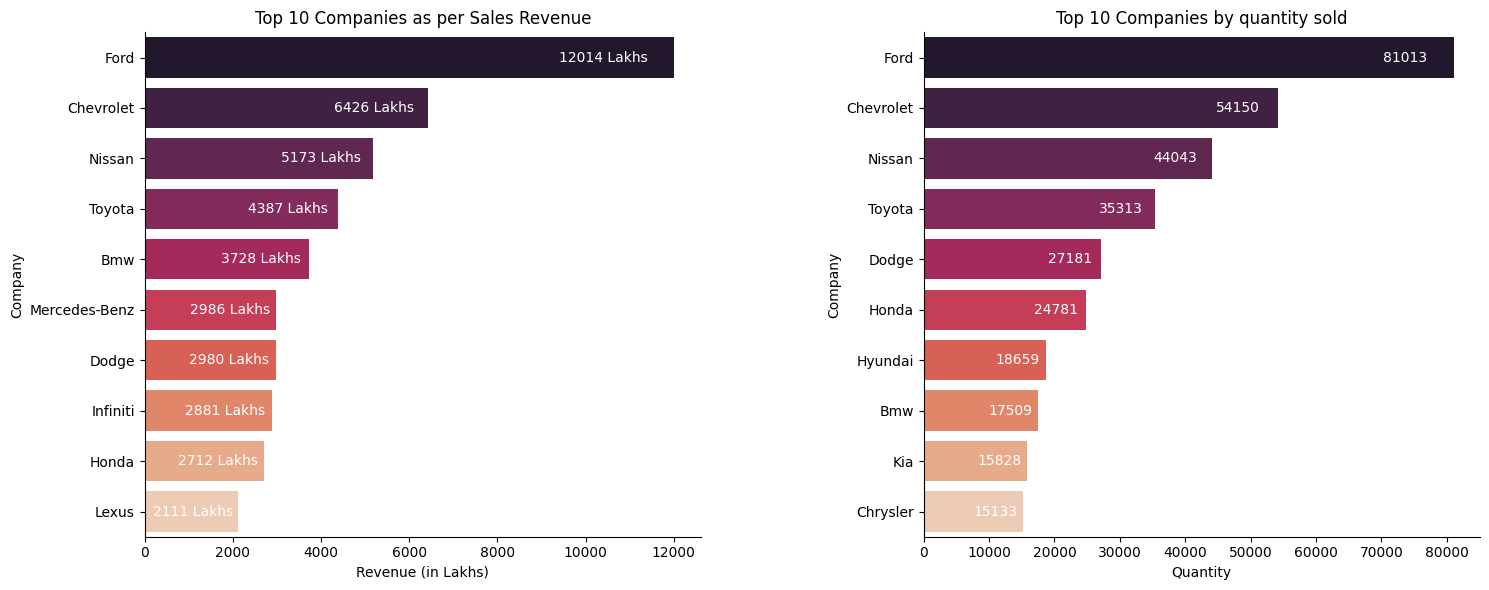

In [38]:
fig,axes=plt.subplots(1,2,figsize=(15,6))

ax1=(sns.barplot(y=company_revenue.index,x=company_revenue.values,palette='rocket',hue=company_revenue.index,legend=False,ax=axes[0]))

axes[0].set_ylabel('Company')
axes[0].set_xlabel('Revenue (in Lakhs)')
axes[0].set_title('Top 10 Companies as per Sales Revenue')

for i, (value, label) in enumerate(zip(company_revenue.values, company_revenue.index)):
    ax1.text(
        value * 0.95,    # X position — near the end of bar
        i,               # Y position — bar index
        f'{value:.00f} Lakhs',  # Text — integer format
        va='center',     # Vertically center
        ha='right',      # Align text to right (inside bar)
        color='white',   # Text color
        fontsize=10
    )


ax2=(sns.barplot(y=company_quantity.index,x=company_quantity.values,palette='rocket',hue=company_quantity.index,legend=False,ax=axes[1]))

axes[1].set_ylabel('Company')
axes[1].set_xlabel('Quantity')
axes[1].set_title('Top 10 Companies by quantity sold')

for i, (value, label) in enumerate(zip(company_quantity.values, company_quantity.index)):
    ax2.text(
        value * 0.95,    # X position — near the end of bar
        i,               # Y position — bar index
        f'{value}',  # Text — integer format
        va='center',     # Vertically center
        ha='right',      # Align text to right (inside bar)
        color='white',   # Text color
        fontsize=10
    )
sns.despine()
plt.tight_layout()
plt.subplots_adjust(wspace=0.4,hspace=1)
plt.show()

###Models

Top 10 Models as per sales

In [39]:
model_revenue = (
    df.groupby('Company-Model')['Selling_Price']
    .sum()
    .sort_values(ascending=False)
    .head(10)/ 1e5  # Convert to Lakhs
)

Top 10 Models as per quantity

In [40]:
model_quantity=df['Company-Model'].value_counts().head(10)

Visualising

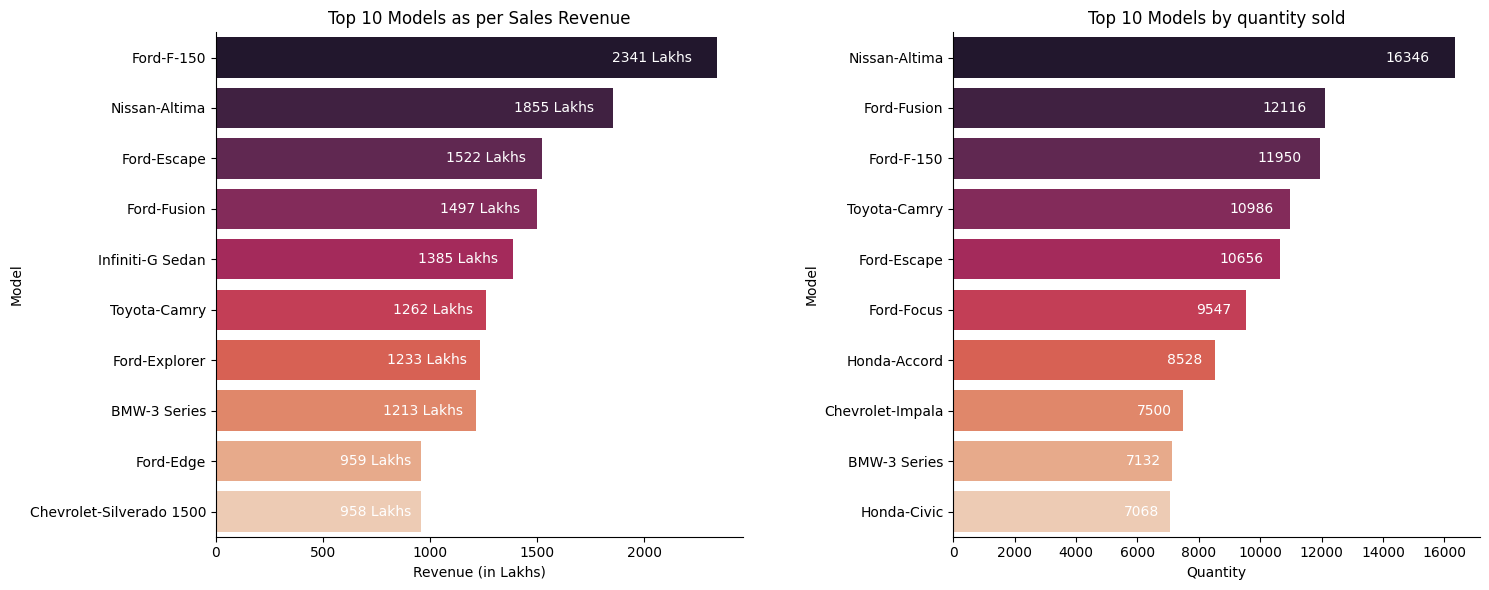

In [42]:
fig,axes=plt.subplots(1,2,figsize=(15,6))

ax1=(sns.barplot(y=model_revenue.index,x=model_revenue.values,palette='rocket',hue=model_revenue.index,legend=False,ax=axes[0]))

axes[0].set_ylabel('Model')
axes[0].set_xlabel('Revenue (in Lakhs)')
axes[0].set_title('Top 10 Models as per Sales Revenue')

for i, (value, label) in enumerate(zip(model_revenue.values, model_revenue.index)):
    ax1.text(
        value * 0.95,    # X position — near the end of bar
        i,               # Y position — bar index
        f'{value:.00f} Lakhs',  # Text — integer format
        va='center',     # Vertically center
        ha='right',      # Align text to right (inside bar)
        color='white',   # Text color
        fontsize=10
    )


ax2=(sns.barplot(y=model_quantity.index,x=model_quantity.values,palette='rocket',hue=model_quantity.index,legend=False,ax=axes[1]))

axes[1].set_ylabel('Model')
axes[1].set_xlabel('Quantity')
axes[1].set_title('Top 10 Models by quantity sold')

for i, (value, label) in enumerate(zip(model_quantity.values, model_quantity.index)):
    ax2.text(
        value * 0.95,    # X position — near the end of bar
        i,               # Y position — bar index
        f'{value}',  # Text — integer format
        va='center',     # Vertically center
        ha='right',      # Align text to right (inside bar)
        color='white',   # Text color
        fontsize=10
    )
sns.despine()
plt.tight_layout()
plt.subplots_adjust(wspace=0.4,hspace=1)
plt.show()

###Tree Chart

In [51]:
model_rev2=df.groupby(['Company','Model'])['Selling_Price'].sum().reset_index().sort_values(by='Selling_Price', ascending=False)

In [55]:
fig = px.treemap(
    model_rev2.head(50),
    path=['Company', 'Model'],   # hierarchy: company → model
    values='Selling_Price',
    title='Top Vehicle Models By Total Revenue'
)

fig.show()